In [1]:
from dora import DataExplorer
import pandas as pd
import matplotlib.pyplot as plt

explorer = DataExplorer()

## Basic Order Stats Aggregated by Product

In [2]:
response = explorer.orders.statsByProduct(order_by='numunits_sum')
stats_df = pd.DataFrame(
    data=response.results, 
    columns=response.columns)

stats_df.head()

,productid,asin,num_orders,first_order,last_order,days_on_sale,unitprice_min,unitprice_max,unitprice_avg,numunits_min,numunits_max,numunits_avg,numunits_sum,totalprice_min,totalprice_max,totalprice_avg,totalprice_sum
0,12820,0007178735,18450,2014-10-29,2015-11-12,379.0,0.00,0.00,0E-24,1,1,1.00000000000000000000,18450,0.00,0.00,0E-24,0.00
1,11009,000472092X,5874,2010-11-18,2012-01-30,438.0,0.00,20.00,9.6093820224719101,1,147,1.9828055839291794,11647,0.00,735.00,16.4795131086142322,96800.66
2,11168,000611718X,9546,2010-10-07,2013-02-13,860.0,0.00,30.00,21.1517986591242405,1,86,1.1727425099518123,11195,0.00,1290.00,24.3318929394510790,232272.25
3,11196,0006135064,4768,2009-11-17,2016-08-09,2457.0,0.00,25.00,14.3374119127516779,1,750,1.9903523489932886,9490,0.00,2244.00,20.4489765100671141,97500.72
4,12494,0007143486,254,2015-03-23,2016-07-27,492.0,0.00,15.28,9.4796062992125984,1,1000,35.8425196850393701,9104,0.00,5500.00,160.5326377952755906,40775.29


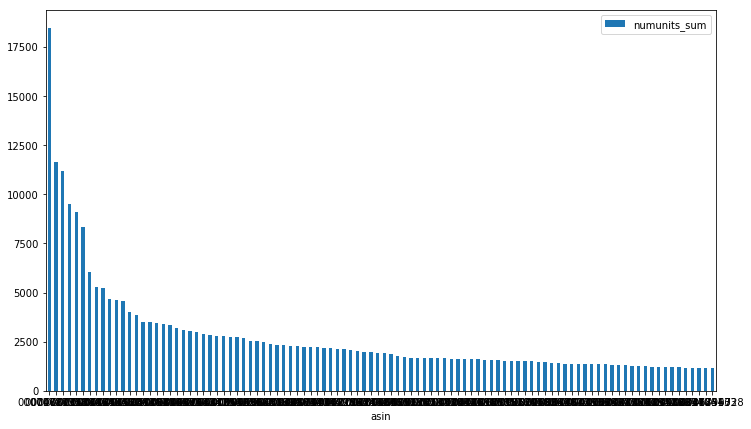

In [13]:
stats_df[:100].plot.bar(x='asin',y='numunits_sum', xticks=[], figsize=(12,7))
plt.show()

## Product Rating Distributions

In [14]:
ratings = explorer.products.ratingsDistribution()
ratings_df = pd.DataFrame(
    data=ratings.results, 
    columns=ratings.columns)
ratings_df.head()

,asin,productid,one_star_votes,two_star_votes,three_star_votes,four_star_votes,five_star_votes
0,0007386648,13970,77,93,253,970,7669
1,0002007770,10204,202,251,404,1238,3906
2,0007124015,12333,121,118,160,426,3496
3,0002247399,10533,651,747,890,1164,3021
4,0007205236,13037,65,50,98,272,986


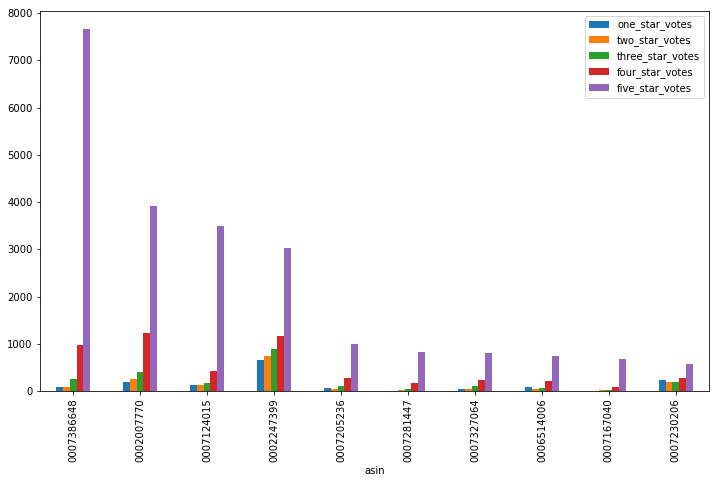

In [15]:
ratings_df[:10].plot.bar(
    x='asin',
    y=[
        'one_star_votes',
        'two_star_votes',
        'three_star_votes',
        'four_star_votes',
        'five_star_votes'
    ], figsize=(12,7))

plt.show()

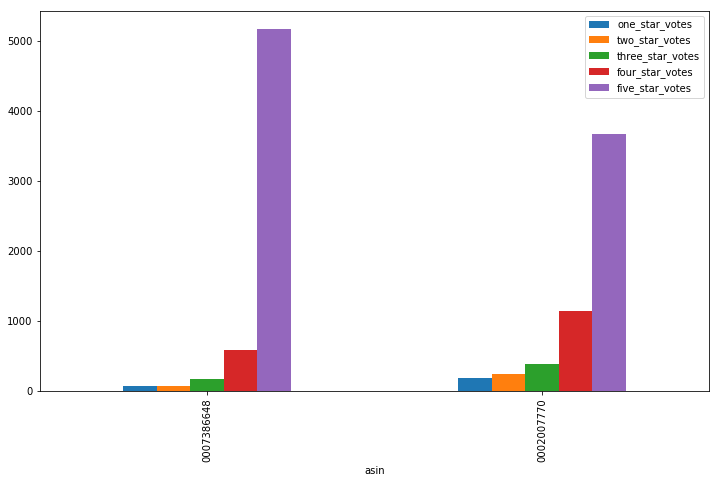

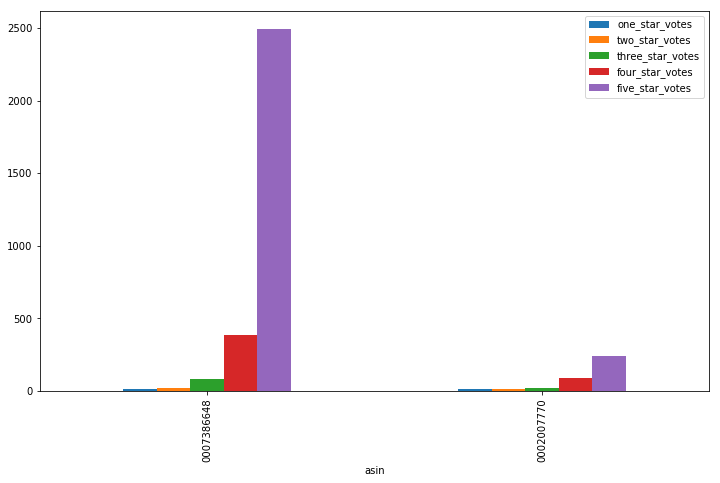

In [6]:
old_ratings = explorer.products.ratingsDistribution(max_date='2013-12-31', asin=('0007386648','0002007770'))
new_ratings = explorer.products.ratingsDistribution(min_date='2014-1-1', asin=('0007386648','0002007770'))

old_ratings_df = pd.DataFrame(
    data=old_ratings.results, 
    columns=old_ratings.columns)

new_ratings_df = pd.DataFrame(
    data=new_ratings.results, 
    columns=new_ratings.columns)

old_ratings_df.plot.bar(
    x='asin',
    y=[
        'one_star_votes',
        'two_star_votes',
        'three_star_votes',
        'four_star_votes',
        'five_star_votes'
    ], figsize=(12,7))

new_ratings_df.plot.bar(
    x='asin',
    y=[
        'one_star_votes',
        'two_star_votes',
        'three_star_votes',
        'four_star_votes',
        'five_star_votes'
    ], figsize=(12,7))
plt.show()

In [9]:
review_terms = explorer.reviews.termsByAsin('0007386648')
print(review_terms.facets['facet_fields']['reviewText'])

['war', 2225, 'life', 1909, 'amazing', 1762, 'great', 1607, 'written', 1548, 'true', 1309, 'wwii', 1287, 'hillenbrand', 1278, 'time', 1204, 'zamperini', 1204, 'recommend', 1140, 'man', 1120, 'louis', 1099, 'much', 1083, 'history', 1059, 'louie', 1044, 'best', 1024, 'laura', 1010, 'japanese', 1003, 'human', 982, 'world', 956, 'author', 904, 'never', 890, 'men', 858, 'survival', 852, 'unbroken', 844, 'hard', 843, 'good', 835, 'pow', 802, 'pacific', 771, 'know', 728, 'highly', 725, 'incredible', 717, 'must', 699, "couldn't", 669, 'people', 669, 'ii', 667, 'went', 641, 'truly', 635, 'anyone', 630, 'us', 622, 'american', 598, 'think', 597, 'years', 586, 'times', 584, 'found', 576, 'inspiring', 571, 'survive', 568, 'spirit', 567, 'long', 566, 'loved', 557, 'unbelievable', 555, 'writing', 548, 'told', 516, 'everyone', 502, 'love', 494, 'wonderful', 490, 'endured', 485, "don't", 481, 'excellent', 465, 'camps', 461, 'page', 458, 'believe', 456, 'hero', 452, 'movie', 451, 'still', 443, 'interest

In [12]:
similar = explorer.reviews.asinByTerms(['war','life'])
print(similar.facets['facet_fields']['asin'])

['0007386648', 12, '0002051850', 2, '0000000116', 0, '0000000868', 0, '0000013714', 0, '0000015393', 0, '0000029831', 0, '0000038504', 0, '0000041696', 0, '0000095699', 0, '0000174076', 0, '0000202010', 0, '0000230022', 0, '0000401048', 0, '0000477141', 0, '000047715x', 0, '0000619574', 0, '000077135x', 0, '0000913154', 0, '000100039x', 0, '0001001787', 0, '0001006002', 0, '0001006657', 0, '0001018043', 0, '0001019880', 0, '000102521x', 0, '0001026038', 0, '0001035649', 0, '0001042335', 0, '0001047566', 0, '0001048236', 0, '0001048775', 0, '0001048791', 0, '0001048813', 0, '0001053396', 0, '0001053655', 0, '0001053744', 0, '0001055178', 0, '0001056107', 0, '0001056530', 0, '0001057138', 0, '0001057146', 0, '0001057170', 0, '0001057324', 0, '0001061100', 0, '0001061127', 0, '0001062395', 0, '0001064487', 0, '0001072986', 0, '0001127748', 0, '0001148427', 0, '0001203010', 0, '0001203088', 0, '0001360000', 0, '0001360183', 0, '0001360779', 0, '0001361139', 0, '0001361155', 0, '000136118x'